In [7]:
# this notebook will implement a streamwise abrasion model for three different lithologies.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# we want a 1D model, so start with grid setup stuff
dx = 1
x = np.arange(1, 101, dx)

# now create arrays to hold lithologies
ig = np.zeros(len(x))
mtm = np.zeros(len(x))
sed = np.zeros(len(x))

# now assign initial amounts of each lithology (think of this as % of each lithology within the basin)
ig[:] = 60
mtm[:] = 10
sed[:] = 30

# come up with some abrasion coefficients
# a higher coefficient means the rock will abrade more readily
beta_ig = 1e-6
beta_mtm = 1e-5
beta_sed = 5e-5

In [10]:
# now write a loop to see how different lithologies get abraded downstream
for i in range(100):
    
    # create array to hold all grains
    all_grains = ig + mtm + sed
    
    # abrade igneous rocks
    ig_amount_abraded = (x**2) * beta_ig
    ig -= ig_amount_abraded
    ig = np.where(ig_amount_abraded <= 0, 0, ig)
    percent_ig = ig/all_grains
    
    # abrade metamorphic rocks
    mtm_amount_abraded = (x**2) * beta_mtm
    mtm -= mtm_amount_abraded
    mtm = np.where(mtm_amount_abraded <= 0, 0, mtm)
    percent_mtm = mtm/all_grains
    
    # abrade sedimentary rocks
    sed_amount_abraded = (x**2) * beta_sed
    sed -= sed_amount_abraded
    sed = np.where(sed < 0, 0, sed)
    percent_sed = sed/all_grains

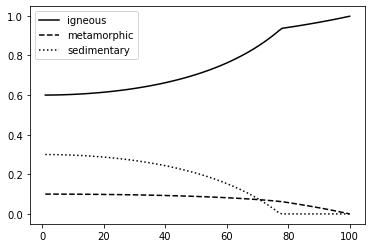

In [11]:
plt.plot(x, percent_ig, 'k', label = 'igneous', linestyle = '-')
plt.plot(x, percent_mtm, 'k', label = 'metamorphic', linestyle = '--')
plt.plot(x, percent_sed, 'k', label = 'sedimentary', linestyle = ':')
plt.legend()
plt.show()

cell dimensions: w x h x dx

ig mass = (fraction of igneous) x cell volume x (1 - porosity) x ig density

rate of igneous mass change = (volume rate in * igneous density) - (volume rate out * igneous density) - (volume rate in * igneous density * abrasion coefficient)

volume rate in = (volume/width/time) * width

$$\frac{\partial m}{\partial t} = \rho q_s(x) w - \rho q_s(x+dx) w - \rho q_s(x) dx w \beta$$

abrasion rate = q_s x surface area x dx x abrasion coefficient